# SQL: Basic queries on relational databases

## Relational databases: Review

A **relational database** is a way of structuring information in tables, rows, and columns. You could compare it to an excel file (database) with several sheets (tables) that contain tabular data (rows and columns). The particularity of this database is its ability to create relationships between those tables by joining them.

What is a `join`? Let's take an example by looking at the schema of a database of a music producer. You can see here that certain fields are common between several tables.

For example: `ArtistID` exists in `artists` and in `albums`. Consequently the information from an artist can be included (_joined_) to the information of his/her albums.

<img src="https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg" />

SQL (Structured Query Language) is one of the most common languages for interacting with a relational database. It allows you to perform efficient and precise queries on the database, including queries among different tables.

SQL mainly allows you to `select`, `insert`, `update` or `delete` data from the DB.

Before diving in the exercises:

- You can learn the basics of SQL language by practicing [this tutorial](https://www.w3schools.com/sql/sql_syntax.asp)
- Try to understand the structure of the DB based on its schema. You will get more information about it [here](https://www.sqlitetutorial.net/sqlite-sample-database/)

Now, let's do some exercices by using SQLite and the python module `sqlite3`. You don't need to install it, it is included in the Python distribution. Read more: [SQLite3 Documentation](https://docs.python.org/3/library/sqlite3.html).




### Connetion to the database

We need to create a new database and open a database connection to allow `sqlite3` to work with it. Call `sqlite3.connect()` to create a connection to the database in the current working directory, implicitly creating it if it does not exist.

In order to execute SQL statements and fetch results from SQL queries, we will need to use a database cursor. Call `con.cursor()` to create the `Cursor`.

In [1]:
import sqlite3

connexion = sqlite3.connect("data/chinook.db")
cursor = connexion.cursor()

## Basic Queries

**1. Show the 10 first entries of the table `artists`**

The basic command in SQL is `SELECT` which is used for retrieving elements of certain columns `FROM` a table. `SELECT` indicates the columns to retrieve. By using `*` we chose to get keep all the columns. The keyword `LIMIT` is used for retrieving only the first `n` rows from the table.

You can use `cursor.execute()` to execute that query and call `cursor.fetchall()` to fetch the resulting rows.


In [8]:
cursor.execute("""
    SELECT
        *
    FROM
        artists
    LIMIT 10;
""")
cursor.fetchall()

[(1, 'AC/DC'),
 (2, 'Accept'),
 (3, 'Aerosmith'),
 (4, 'Alanis Morissette'),
 (5, 'Alice In Chains'),
 (6, 'Antônio Carlos Jobim'),
 (7, 'Apocalyptica'),
 (8, 'Audioslave'),
 (9, 'BackBeat'),
 (10, 'Billy Cobham')]

**2. Find the ID of Aerosmith** 

Let's introduce here conditions by using the keyword `WHERE`. The goal is to retrieve only the rows that meet a given condition.

Here we will retrive here the column `artistId` from the table `artists` for the entries whose the name is `Aerosmith`.

In [12]:
query1 = f"""
    SELECT
        artistId
    FROM
        artists
    WHERE
        name = 'Aerosmith';
"""
cursor.execute(query1)
artist_id = cursor.fetchone()[0]

artist_id

3

In [5]:
# i did just for test
cursor.execute("""
    SELECT
        *
    FROM
        albums
    LIMIT 10;
""")
cursor.fetchall()

[(1, 'For Those About To Rock We Salute You', 1),
 (2, 'Balls to the Wall', 2),
 (3, 'Restless and Wild', 2),
 (4, 'Let There Be Rock', 1),
 (5, 'Big Ones', 3),
 (6, 'Jagged Little Pill', 4),
 (7, 'Facelift', 5),
 (8, 'Warner 25 Anos', 6),
 (9, 'Plays Metallica By Four Cellos', 7),
 (10, 'Audioslave', 8)]

**3. Find the IDs of the albums of Aerosmith**

Now that we have the `artistId` of Aerosmith we can use it in another query. We will retrieve the field `albumId` for the rows from album whose `artistId` is the one of Aerosmith.

In [13]:
query2 = f"""
    SELECT
        albumId
    FROM 
        albums 
    WHERE 
        artistId = '{artist_id}';
"""
albums_ids = []
for row in cursor.execute(query2):
    albums_ids.append(str(row[0]))

print(albums_ids)

['5']


**4. Find the track names of the albums of Aerosmith**

Now that we have the ids of all the albums of Aerosmith we can look for the tracks that are in those albums. We will introduce here the `DISTINCT` keyword that will retrieve unique values only.


In [7]:
# i did just for test
cursor.execute("""
    SELECT
        *
    FROM
        tracks
    LIMIT 2;
""")
cursor.fetchall()

[(1,
  'For Those About To Rock (We Salute You)',
  1,
  1,
  1,
  'Angus Young, Malcolm Young, Brian Johnson',
  343719,
  11170334,
  0.99),
 (2, 'Balls to the Wall', 2, 2, 1, None, 342562, 5510424, 0.99)]

In [14]:
query3 = f"""
    SELECT
        DISTINCT name
    FROM
        tracks
    WHERE 
        albumId IN ({",".join(albums_ids)});
"""

for row in cursor.execute(query3):
    print(row[0])

Walk On Water
Love In An Elevator
Rag Doll
What It Takes
Dude (Looks Like A Lady)
Janie's Got A Gun
Cryin'
Amazing
Blind Man
Deuces Are Wild
The Other Side
Crazy
Eat The Rich
Angel
Livin' On The Edge


**5. Put that in a single query!**

Let's do everything we have done so far in a single query.

Before that it is important to understand the concept of `PRIMARY KEY` and `FOREIGN KEY`:

- **Primary Keys** are fields that are **unique** and cannot be null. It uniquely identifies each record in a table (in general this is the `id` of the item). Each table can have zero or one primary key (not more). This key can consist of one or multiple columns. 
- **Foreign Keys** are fields in one table that refer to the primary key of another table. One table can contain multiple foreign keys.

Let's take an example: 
* In our dataset the table `artists` has `artistId` as primary key. The table `albums` uses `artistId` as a foreign key to refer to the table `artists`. 
* The idea of joining table is based on that: we will use the `JOIN` keyword in order to put information from different tables together by using common keys. 
* The keyword `ON` will specify which keys will be used to join the tables.

In [15]:
query4 = f"""
    SELECT
        distinct(tracks.name)
    FROM
        artists
        JOIN albums ON artists.artistId = albums.artistId
        JOIN tracks ON albums.albumId = tracks.albumId
    WHERE 
        artists.name = 'Aerosmith';
"""

songs = set()
for row in cursor.execute(query4):
    print(row[0])
    

Walk On Water
Love In An Elevator
Rag Doll
What It Takes
Dude (Looks Like A Lady)
Janie's Got A Gun
Cryin'
Amazing
Blind Man
Deuces Are Wild
The Other Side
Crazy
Eat The Rich
Angel
Livin' On The Edge


**6. Get the most productive artists**

Let's count the number of albums by artist by using `GROUP BY`. We will select the artists and group all the albums they have released.

`COUNT` will count the number of albums and `AS` will give a variable name to the counter (`nb_albums`).

`ORDER BY` will rank the results according to the variable `nb_albums`. `DESC` gives the orientation of the rank (in that case: descending)

`LIMIT` will show only the first results of the ranking (i.e. the most productive artists).

In [16]:
query5 = """

    SELECT
        artists.Name,
        count(*) AS nb_albums
    FROM
        artists
        JOIN albums on albums.ArtistId = artists.ArtistId
    GROUP BY
        artists.ArtistId
    ORDER BY
        nb_albums DESC
    LIMIT 10;

"""
cursor.execute(query5)
cursor.fetchall()

[('Iron Maiden', 21),
 ('Led Zeppelin', 14),
 ('Deep Purple', 11),
 ('Metallica', 10),
 ('U2', 10),
 ('Ozzy Osbourne', 6),
 ('Pearl Jam', 5),
 ('Various Artists', 4),
 ('Faith No More', 4),
 ('Foo Fighters', 4)]

#### Your turn!

Based on your knowledge and some Google search try to create the following queries:

- Count the number of tracks for all the albums of AC/DC
- List all the artists doing 'Metal' (genre)
- List the top 10 of invoiced countries
- Calculate the total amount billed to each customer

1  Count the number of tracks for all the albums of AC/DC

In [10]:
query6 = """
SELECT 
    albums.Title AS AlbumTitle, 
    COUNT(tracks.TrackId) AS TrackCount 
FROM 
    artists 
    JOIN albums ON artists.ArtistId = albums.ArtistId 
    JOIN tracks ON albums.AlbumId = tracks.AlbumId 
WHERE 
    artists.Name = 'AC/DC' 
GROUP BY 
    albums.AlbumId;"""

cursor.execute(query6)
cursor.fetchall()

[('For Those About To Rock We Salute You', 10), ('Let There Be Rock', 8)]

2 List all the artists doing "Metal" (genre)

In [11]:
query7 = """
SELECT 
    DISTINCT artists.Name 
FROM 
    artists 
    JOIN albums ON artists.ArtistId = albums.ArtistId 
    JOIN tracks ON albums.AlbumId = tracks.AlbumId 
    JOIN genres ON tracks.GenreId = genres.GenreId 
WHERE 
    genres.Name = 'Metal';"""

cursor.execute(query7)
cursor.fetchall()


[('Apocalyptica',),
 ('Black Label Society',),
 ('Black Sabbath',),
 ('Bruce Dickinson',),
 ('Metallica',),
 ('Godsmack',),
 ("Guns N' Roses",),
 ('Iron Maiden',),
 ('Judas Priest',),
 ('Motörhead',),
 ('Mötley Crüe',),
 ('Ozzy Osbourne',),
 ('System Of A Down',),
 ('Lenny Kravitz',)]

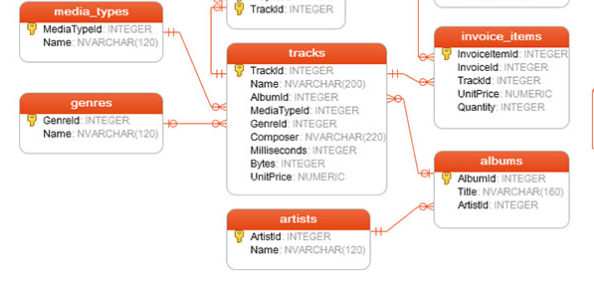

3 List the top of 10 of invoiced countries

In [12]:
query8 = """
SELECT 
    customers.Country, 
    SUM(invoices.Total) AS TotalInvoiced 
FROM 
    customers 
    JOIN invoices ON customers.CustomerId = invoices.CustomerId 
GROUP BY 
    customers.Country 
ORDER BY 
    TotalInvoiced DESC 
LIMIT 10;
"""
cursor.execute(query8)
cursor.fetchall()


[('USA', 523.06),
 ('Canada', 303.96),
 ('France', 195.1),
 ('Brazil', 190.1),
 ('Germany', 156.48),
 ('United Kingdom', 112.86),
 ('Czech Republic', 90.24),
 ('Portugal', 77.24),
 ('India', 75.26),
 ('Chile', 46.62)]

4 Calculate the total amount billed to each customer

In [13]:
query9 = """
SELECT 
    customers.CustomerId, 
    customers.FirstName || ' ' || customers.LastName AS CustomerName, 
    SUM(invoices.Total) AS TotalBilled 
FROM 
    customers 
    JOIN invoices ON customers.CustomerId = invoices.CustomerId 
GROUP BY 
    customers.CustomerId 
ORDER BY 
    TotalBilled DESC;"""

cursor.execute(query9)
cursor.fetchall()

[(6, 'Helena Holý', 49.62),
 (26, 'Richard Cunningham', 47.62),
 (57, 'Luis Rojas', 46.62),
 (45, 'Ladislav Kovács', 45.62),
 (46, "Hugh O'Reilly", 45.62),
 (24, 'Frank Ralston', 43.62),
 (28, 'Julia Barnett', 43.62),
 (37, 'Fynn Zimmermann', 43.62),
 (7, 'Astrid Gruber', 42.62),
 (25, 'Victor Stevens', 42.62),
 (44, 'Terhi Hämäläinen', 41.62),
 (5, 'František Wichterlová', 40.62),
 (43, 'Isabelle Mercier', 40.62),
 (48, 'Johannes Van der Berg', 40.62),
 (1, 'Luís Gonçalves', 39.62),
 (3, 'François Tremblay', 39.62),
 (4, 'Bjørn Hansen', 39.62),
 (17, 'Jack Smith', 39.62),
 (20, 'Dan Miller', 39.62),
 (22, 'Heather Leacock', 39.62),
 (34, 'João Fernandes', 39.62),
 (42, 'Wyatt Girard', 39.62),
 (15, 'Jennifer Peterson', 38.62),
 (19, 'Tim Goyer', 38.62),
 (39, 'Camille Bernard', 38.62),
 (40, 'Dominique Lefebvre', 38.62),
 (51, 'Joakim Johansson', 38.62),
 (58, 'Manoj Pareek', 38.62),
 (2, 'Leonie Köhler', 37.62),
 (8, 'Daan Peeters', 37.62),
 (9, 'Kara Nielsen', 37.62),
 (10, 'Eduardo

## Resources

- [Top 70 most important queries](https://bytescout.com/blog/20-important-sql-queries.html)
- [SQL Murder Mystery](https://mystery.knightlab.com/): Use SQL to find the MURDERER
- [TablePlus](https://tableplus.com/): A nice editor for SQL queries
- [SQL Fundamentals ](https://app.datacamp.com/learn/skill-tracks/sql-fundamentals)(DataCamp Track, 5 courses)
- [SQL for Business Analysts ](https://app.datacamp.com/learn/skill-tracks/sql-for-business-analysts)(DataCamp Track, 5 courses)
- [Data Analyst in SQL ](https://app.datacamp.com/learn/career-tracks/data-analyst-in-sql)(DataCamp Track, 12 courses)
- [The 80 Top SQL Interview Questions and Answers for Beginners & Intermediate Practitioners](https://www.datacamp.com/blog/top-sql-interview-questions-and-answers-for-beginners-and-intermediate-practitioners)

https://bytescout.com/blog/20-important-sql-queries.html#1